In [1]:
# Import the dependency.
import pandas as pd
from pathlib import Path

In [2]:
#importing lat and lng data from our North America dataset

lat_lng = Path("../Data/zip_to_lat_lon_North_America.csv")

lat_lng_df = pd.read_csv(lat_lng)

lat_lng_df.tail()

/var/folders/gm/7wvsytlx5p96hndp091d87x00000gn/T/ipykernel_2792/2560635865.py:5: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  lat_lng_df = pd.read_csv(lat_lng)


,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent
189886,VI,801,St Thomas,Vi,78,St. Thomas,30.0,NaN,NaN,18.3484,-64.9740,6.0,U.S. Virgin Islands,North America
189887,VI,802,St Thomas,Vi,78,St. Thomas,30.0,NaN,NaN,18.3387,-64.9160,6.0,U.S. Virgin Islands,North America
189888,VI,803,St Thomas,Vi,78,St. Thomas,30.0,NaN,NaN,18.3223,-64.9637,NaN,U.S. Virgin Islands,North America
189889,VI,804,St Thomas,Vi,78,St. Thomas,30.0,NaN,NaN,18.3223,-64.9637,NaN,U.S. Virgin Islands,North America
189890,VI,805,St Thomas,Vi,78,St. Thomas,30.0,NaN,NaN,18.3223,-64.9637,NaN,U.S. Virgin Islands,North America


In [3]:
#Previewing the column names and counts
lat_lng_df.count()

country code              189891
postal code               189891
place                     189891
state                     188801
statecode                 188803
province_or_county        187347
province_or_countycode    186612
community                  51700
communitycode              51700
latitude                  189891
longitude                 189891
accuracy                  189280
Country                   189891
Continent                 189891
dtype: int64

In [4]:
#dropping unnecessary column names
lat_lng_df_cleaned = lat_lng_df.drop(columns=['province_or_county', 'province_or_countycode', 'community', 'communitycode'])
lat_lng_df_cleaned.head()

,country code,postal code,place,state,statecode,latitude,longitude,accuracy,Country,Continent
0,BM,DV 01,Devonshire,Devonshire Parish,1,32.3028,-64.7558,NaN,Bermuda,North America
1,BM,DV 02,Devonshire,Devonshire Parish,1,32.3028,-64.7558,NaN,Bermuda,North America
2,BM,DV 03,Devonshire,Devonshire Parish,1,32.3028,-64.7558,NaN,Bermuda,North America
3,BM,DV 04,Devonshire,Devonshire Parish,1,32.3028,-64.7558,NaN,Bermuda,North America
4,BM,DV 05,Devonshire,Devonshire Parish,1,32.3028,-64.7558,NaN,Bermuda,North America


In [5]:
#confirming column names were dropped 
lat_lng_df_cleaned.count()

country code    189891
postal code     189891
place           189891
state           188801
statecode       188803
latitude        189891
longitude       189891
accuracy        189280
Country         189891
Continent       189891
dtype: int64

In [6]:
#seeing the names of the different countries in our dataframe
countries = lat_lng_df_cleaned['Country'].value_counts()
countries

Country
Mexico                       144655
United States                 41470
Canada                         1656
Guatemala                       548
Dominican Republic              544
Costa Rica                      473
Puerto Rico                     177
Bermuda                         112
Guadeloupe                      105
Martinique                      100
Greenland                        33
U.S. Virgin Islands              16
Saint Pierre and Miquelon         2
Name: count, dtype: int64

In [7]:
#Dropping any country that isn't United States
#May come back and make this more efficent 
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Mexico'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Canada'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Guatemala'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Dominican Republic'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Costa Rica'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Puerto Rico'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Bermuda'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Guadeloupe'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Martinique'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Greenland'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'U.S. Virgin Islands'].index)
lat_lng_df_cleaned = lat_lng_df_cleaned.drop(lat_lng_df_cleaned[lat_lng_df_cleaned['Country'] == 'Saint Pierre and Miquelon'].index)

us_lat_lng_df = lat_lng_df_cleaned['Country'].value_counts()
us_lat_lng_df

Country
United States    41470
Name: count, dtype: int64

In [8]:
#previewing the new dataframe
lat_lng_df_cleaned.head()

,country code,postal code,place,state,statecode,latitude,longitude,accuracy,Country,Continent
148405,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1.0,United States,North America
148406,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,1.0,United States,North America
148407,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,1.0,United States,North America
148408,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,1.0,United States,North America
148409,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,1.0,United States,North America


In [9]:
#Renaming column name to prepare the dataframe for merging 
lat_lng_df_cleaned = lat_lng_df_cleaned.rename(columns={'postal code': 'zip code'})

lat_lng_df_cleaned.head()

,country code,zip code,place,state,statecode,latitude,longitude,accuracy,Country,Continent
148405,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1.0,United States,North America
148406,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,1.0,United States,North America
148407,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,1.0,United States,North America
148408,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,1.0,United States,North America
148409,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,1.0,United States,North America


In [10]:
#Importing our second dataframe, which contains information on hospitals and providers
hospitals_data = Path("../Data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.xlsx")

hosptials_df = pd.read_excel(hospitals_data, header = 5)


hosptials_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,20,4.375313e+05,240422.800000,133509.550000
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,25,8.156741e+05,233197.480000,221681.800000
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,14,1.499044e+06,415968.785714,366608.928571
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,23,2.238699e+06,420865.478261,403453.652174


In [11]:
#looking at the count and column names
hosptials_df.count()

DRG Definition                                202656
Provider Id                                   202656
Provider Name                                 202656
Provider Street Address                       202656
Provider City                                 202656
Provider State                                202656
Provider Zip Code                             202656
Hospital Referral Region (HRR) Description    202656
Total Discharges                              202656
Average Covered Charges                       202656
Average Total Payments                        202656
Average Medicare Payments                     202656
dtype: int64

In [12]:
#Renaming the zip code column to prepare it for a merge 
hosptials_df = hosptials_df.rename(columns={'Provider Zip Code': 'zip code'})

hosptials_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,zip code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,20,4.375313e+05,240422.800000,133509.550000
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,25,8.156741e+05,233197.480000,221681.800000
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,14,1.499044e+06,415968.785714,366608.928571
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,23,2.238699e+06,420865.478261,403453.652174


In [13]:
#merging the two dataframes together based on the column 'zip code'
merged_data_df = pd.merge(hosptials_df, lat_lng_df_cleaned, on='zip code', how='inner')

merged_data_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,zip code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,...,Average Medicare Payments,country code,place,state,statecode,latitude,longitude,accuracy,Country,Continent
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,...,244457.923077,US,Birmingham,Alabama,AL,33.5062,-86.8003,4.0,United States,North America
1,003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,92,6.715938e+05,...,135713.076087,US,Birmingham,Alabama,AL,33.5062,-86.8003,4.0,United States,North America
2,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,54,4.501202e+05,...,88024.259259,US,Birmingham,Alabama,AL,33.5062,-86.8003,4.0,United States,North America
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,16,3.018496e+05,...,60141.375000,US,Birmingham,Alabama,AL,33.5062,-86.8003,4.0,United States,North America
4,"011 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGN...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,15,2.041137e+05,...,38319.400000,US,Birmingham,Alabama,AL,33.5062,-86.8003,4.0,United States,North America


In [14]:
#dropping repeat column names
merged_data_df = merged_data_df.drop(columns=['country code', 'place', 'state', 'statecode', 'accuracy'])

merged_data_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,zip code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,latitude,longitude,Country,Continent
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077,33.5062,-86.8003,United States,North America
1,003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,92,6.715938e+05,145120.956522,135713.076087,33.5062,-86.8003,United States,North America
2,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,54,4.501202e+05,94398.092593,88024.259259,33.5062,-86.8003,United States,North America
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,16,3.018496e+05,68752.250000,60141.375000,33.5062,-86.8003,United States,North America
4,"011 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGN...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,15,2.041137e+05,39945.200000,38319.400000,33.5062,-86.8003,United States,North America


In [15]:
#Checking to see if the important was successful
merged_data_df.count()

DRG Definition                                202656
Provider Id                                   202656
Provider Name                                 202656
Provider Street Address                       202656
Provider City                                 202656
Provider State                                202656
zip code                                      202656
Hospital Referral Region (HRR) Description    202656
Total Discharges                              202656
Average Covered Charges                       202656
Average Total Payments                        202656
Average Medicare Payments                     202656
latitude                                      202656
longitude                                     202656
Country                                       202656
Continent                                     202656
dtype: int64

In [16]:
#Confirming whether we have to change the Dtype
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202656 entries, 0 to 202655
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              202656 non-null  object 
 1   Provider Id                                 202656 non-null  int64  
 2   Provider Name                               202656 non-null  object 
 3   Provider Street Address                     202656 non-null  object 
 4   Provider City                               202656 non-null  object 
 5   Provider State                              202656 non-null  object 
 6   zip code                                    202656 non-null  object 
 7   Hospital Referral Region (HRR) Description  202656 non-null  object 
 8   Total Discharges                            202656 non-null  int64  
 9   Average Covered Charges                     202656 non-null  float64
 

In [17]:
#Previewing the longitude values to check for NaN values
merged_data_check = merged_data_df['longitude'].value_counts()

merged_data_check

longitude
-95.4010     610
-73.9588     591
-85.7476     579
-92.3455     553
-97.3184     456
            ... 
-82.1325       1
-80.1897       1
-82.4856       1
-83.2319       1
-122.5108      1
Name: count, Length: 2968, dtype: int64

In [18]:
#Double check longitude values for NaN values
check_nan = merged_data_df['latitude'].isnull().values.any()

check_nan

False

# extract code number and add column 

In [19]:
merged_data_df.keys()

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'zip code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'latitude', 'longitude', 'Country',
       'Continent'],
      dtype='object')

In [20]:
merged_data_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,zip code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,latitude,longitude,Country,Continent
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077,33.5062,-86.8003,United States,North America
1,003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,92,6.715938e+05,145120.956522,135713.076087,33.5062,-86.8003,United States,North America
2,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,54,4.501202e+05,94398.092593,88024.259259,33.5062,-86.8003,United States,North America
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,16,3.018496e+05,68752.250000,60141.375000,33.5062,-86.8003,United States,North America
4,"011 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGN...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,15,2.041137e+05,39945.200000,38319.400000,33.5062,-86.8003,United States,North America


In [21]:
import matplotlib.pyplot as plt

<Axes: xlabel='Provider State'>

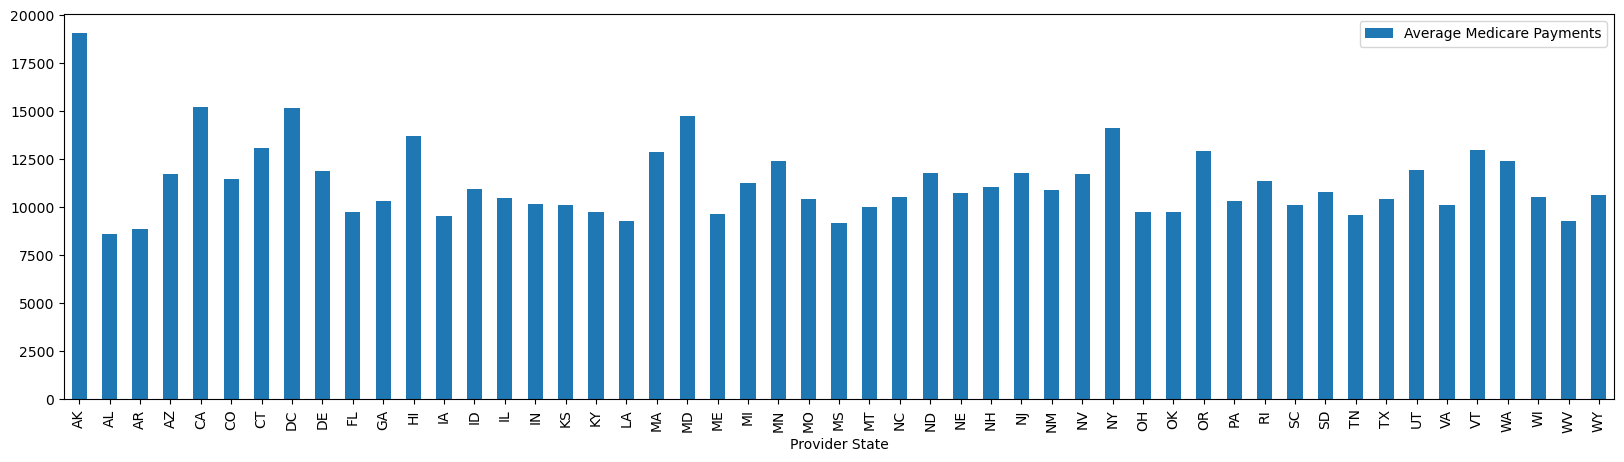

In [22]:
avg_medicare_by_state = merged_data_df.groupby('Provider State')['Average Medicare Payments'].mean()
avg_df = pd.DataFrame(avg_medicare_by_state)
avg_df = avg_df.reset_index()
avg_df.plot(kind='bar', x='Provider State', y='Average Medicare Payments', figsize=[20, 5])


In [58]:
avg_df

,Provider State,Average Medicare Payments
0,AK,19086.685114
1,AL,8634.747553
2,AR,8875.650348
3,AZ,11725.929668
4,CA,15240.353150
5,CO,11468.635856
6,CT,13092.245164
7,DC,15181.321463
8,DE,11877.920829
9,FL,9738.320387


# Procedure bar function

In [56]:
def barPlot(code):
    code_filter = merged_data_df['DRG Definition']
    procedure_df = merged_data_df.loc[code_filter.str.contains(code)].groupby('Provider State')['Average Total Payments'].mean()
    code_df = pd.DataFrame(procedure_df).reset_index()
    code_df.plot.bar(x='Provider State', y='Average Total Payments', figsize=[15,5])
    

    


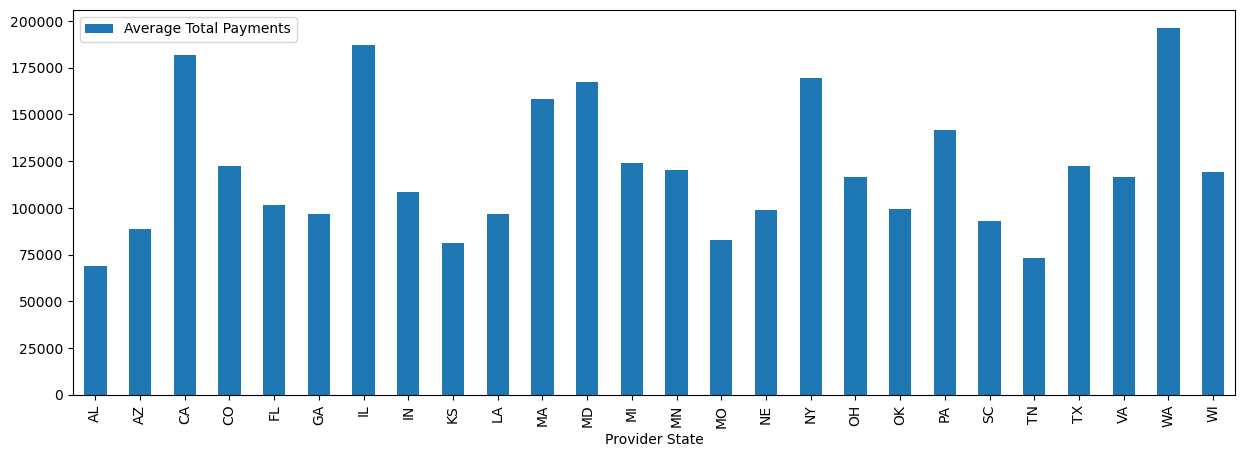

In [24]:
barPlot('005')

# Pie chart to see percentage that medicare covers 

In [109]:
#group the dataframe by state
coverage_df = merged_data_df.copy()
coverage_df
# coverage_df.groupby('Provider State')]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,zip code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,latitude,longitude,Country,Continent
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077,33.5062,-86.8003,United States,North America
1,003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,92,6.715938e+05,145120.956522,135713.076087,33.5062,-86.8003,United States,North America
2,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,54,4.501202e+05,94398.092593,88024.259259,33.5062,-86.8003,United States,North America
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,16,3.018496e+05,68752.250000,60141.375000,33.5062,-86.8003,United States,North America
4,"011 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGN...",10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,15,2.041137e+05,39945.200000,38319.400000,33.5062,-86.8003,United States,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202651,946 - REHABILITATION W/O CC/MCC,330404,WINIFRED MASTERSON BURKE REHABILITATION HOSPITAL,785 MAMARONECK AVENUE,WHITE PLAINS,NY,10605,NY - White Plains,354,1.930107e+04,8369.884181,7986.087571,41.0141,-73.7552,United States,North America
202652,945 - REHABILITATION W CC/MCC,330405,HELEN HAYES HOSPITAL,51 NORTH ROUTE 9W,WEST HAVERSTRAW,NY,10993,NJ - Hackensack,127,1.786654e+04,9165.409449,9089.566929,41.2090,-73.9821,United States,North America
202653,946 - REHABILITATION W/O CC/MCC,330405,HELEN HAYES HOSPITAL,51 NORTH ROUTE 9W,WEST HAVERSTRAW,NY,10993,NJ - Hackensack,355,1.540521e+04,8175.185915,8100.546479,41.2090,-73.9821,United States,North America
202654,948 - SIGNS & SYMPTOMS W/O MCC,70040,HEBREW HOME AND HOSPITAL INC,1 ABRAHMS BOULEVARD,WEST HARTFORD,CT,6117,CT - Hartford,12,5.111417e+03,4773.833333,3664.500000,41.7900,-72.7457,United States,North America


# Find the the top 10 states for medicare coverage 

In [110]:
#find the perdcentage that medicaid covers and append 
coverage_df['coverage_percent'] = round((coverage_df['Average Medicare Payments'] / coverage_df['Average Total Payments'])*100)
coverage_df = coverage_df.rename(columns={'Provider State': 'state',
                            'Average Total Payments': 'total_payments',
                            'Average Medicare Payments': 'medicare_payments',
                            'DRG Definition': 'procedures', 
                            'Total Discharges': 'discharges'})

coverage_df.head(1)

,procedures,Provider Id,Provider Name,Provider Street Address,Provider City,state,zip code,Hospital Referral Region (HRR) Description,discharges,Average Covered Charges,total_payments,medicare_payments,latitude,longitude,Country,Continent,coverage_percent
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077,33.5062,-86.8003,United States,North America,97.0


In [101]:
state_coverage = coverage_df.groupby('state')['coverage_percent'].mean()
coverage_state_df = pd.DataFrame(state_coverage)  
coverage_state_df = coverage_state_df.reset_index()
coverage_state_df = coverage_state_df.sort_values(by='coverage_percent', ascending=False)
top_ten = coverage_state_df.iloc[:10]
top_ten

,state,coverage_percent
20,MD,88.915258
0,AK,87.565737
4,CA,87.312147
19,MA,86.048735
46,VT,85.466851
41,SD,85.094720
32,NM,85.083420
28,ND,84.855634
37,OR,84.822551
26,MT,84.584718


In [102]:
import seaborn as sns

<Axes: xlabel='state', ylabel='coverage_percent'>

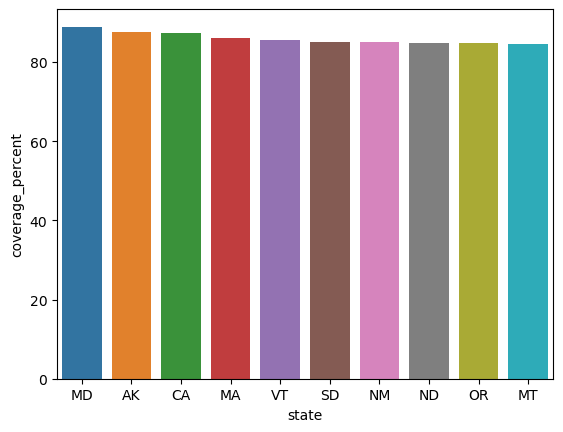

In [106]:
sns.barplot(x='state', y='coverage_percent', data=top_ten)

# Look at discharges

In [176]:
#find the hospital with the most discharged patients to find the hospital with most procedures / success 
discharges = coverage_df.groupby('Provider Name')['discharges'].sum()
discharge_df = pd.DataFrame(discharges)
discharge_df = discharge_df.reset_index().sort_values(by='discharges', ascending=False)

top_hospitals = list(discharge_df.iloc[:20, 0])
hospital_discharges = list(discharge_df.iloc[:20,1])
discharge_df.head(20)    


,Provider Name,discharges
805,FLORIDA HOSPITAL,37886
1796,NEW YORK-PRESBYTERIAN HOSPITAL,27026
155,BAPTIST MEDICAL CENTER,23500
1648,METHODIST HOSPITAL,21067
464,"CHRISTIANA CARE HEALTH SERVICES, INC.",21049
219,"BEAUMONT HOSPITAL, ROYAL OAK",19460
3143,YALE-NEW HAVEN HOSPITAL,19062
917,GOOD SAMARITAN HOSPITAL,18342
1647,METHODIST HEALTHCARE MEMPHIS HOSPITALS,17949
1483,MAYO CLINIC HOSPITAL ROCHESTER,16543


In [155]:
#group the data frame by hospital
all_avg_df = coverage_df.groupby('Provider Name')[['total_payments', 'medicare_payments', 'coverage_percent']].mean().reset_index()
all_avg_df

,Provider Name,total_payments,medicare_payments,coverage_percent
0,ABBEVILLE GENERAL HOSPITAL,8342.921065,7367.396262,87.400000
1,ABBOTT NORTHWESTERN HOSPITAL,15963.920066,13932.495738,83.076271
2,ABILENE REGIONAL MEDICAL CENTER,9937.474107,8643.972262,85.612245
3,ABINGTON MEMORIAL HOSPITAL,15229.170462,12530.551558,78.049451
4,ABRAZO ARROWHEAD CAMPUS,12535.652181,10993.140493,87.120000
...,...,...,...,...
3146,YAVAPAI REGIONAL MEDICAL CENTER,10748.328632,9290.547619,82.853659
3147,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,8191.823408,6935.903006,84.400000
3148,YORK HOSPITAL,14357.438110,10410.600300,76.390947
3149,YUKON KUSKOKWIM DELTA REG HOSPITAL,15882.569930,14699.756410,92.666667


In [185]:
#find the avg total payments and avg total medicare payments for each of the top hospitals 
avg_total = []
avg_coverage = []
percent_covered = []
for hospital in top_hospitals:
    provider = all_avg_df['Provider Name']
    df = all_avg_df.loc[provider == hospital]
    df = df.reset_index()
    total = round(df.total_payments[0],2)
    coverage = round(df.medicare_payments[0],2)
    percent = round(df.coverage_percent[0])
    avg_total.append(total)
    avg_coverage.append(coverage)
    percent_covered.append(percent)
    

In [187]:
#create a dateframe of top_ten
data = {
    'Providers': top_hospitals,
    'Discharges': hospital_discharges,
    'Average Total Payments': avg_total,
    'Average Medicare Payments': avg_coverage, 
    'Average % Covered': percent_covered
}

most_discharged_df = pd.DataFrame(data)
most_discharged_df

,Providers,Discharges,Average Total Payments,Average Medicare Payments,Average % Covered
0,FLORIDA HOSPITAL,37886,15596.78,12197.55,76
1,NEW YORK-PRESBYTERIAN HOSPITAL,27026,29773.69,23833.94,79
2,BAPTIST MEDICAL CENTER,23500,12617.25,10929.23,84
3,METHODIST HOSPITAL,21067,14082.76,11562.92,80
4,"CHRISTIANA CARE HEALTH SERVICES, INC.",21049,16708.80,13796.21,79
5,"BEAUMONT HOSPITAL, ROYAL OAK",19460,15164.95,13119.30,84
6,YALE-NEW HAVEN HOSPITAL,19062,24191.48,20578.46,84
7,GOOD SAMARITAN HOSPITAL,18342,14988.77,12796.12,83
8,METHODIST HEALTHCARE MEMPHIS HOSPITALS,17949,15014.62,12628.14,82
9,MAYO CLINIC HOSPITAL ROCHESTER,16543,23333.20,18034.05,76


# find relationships in data

In [ ]:
#find relationship between total payment and coverage percent


<Axes: xlabel='discharges', ylabel='coverage_percent'>

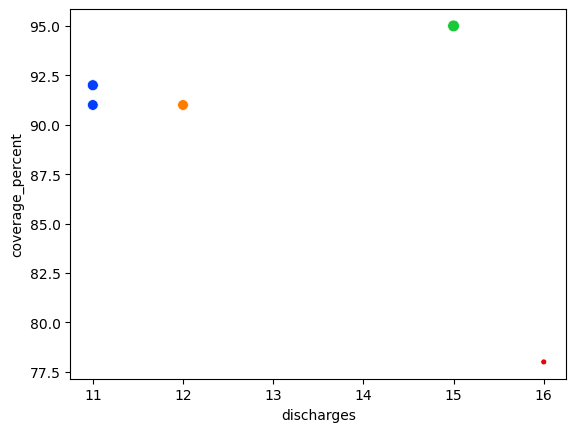

In [169]:
code = '368'
filt = coverage_df.procedures
surg_df = coverage_df.loc[filt.str.contains(code)]
surg_df.head()
sns.scatterplot(data=surg_df, x='discharges', y='coverage_percent', size='coverage_percent', hue='discharges', palette='bright', legend=False)


<Axes: xlabel='coverage_percent', ylabel='total_payments'>

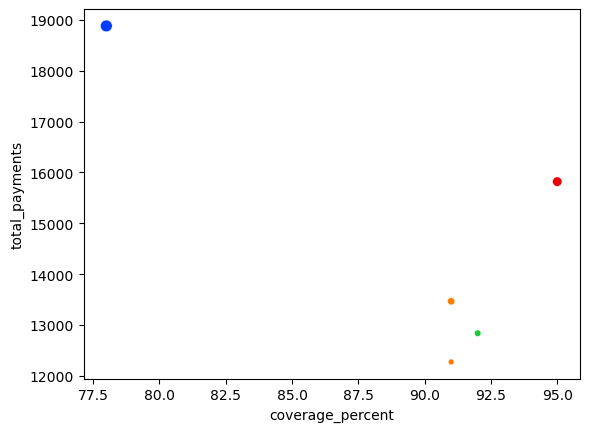

In [170]:
sns.scatterplot(data=surg_df, x='coverage_percent', y='total_payments', size='total_payments', hue='coverage_percent', palette='bright', legend= False)

<Axes: xlabel='discharges', ylabel='total_payments'>

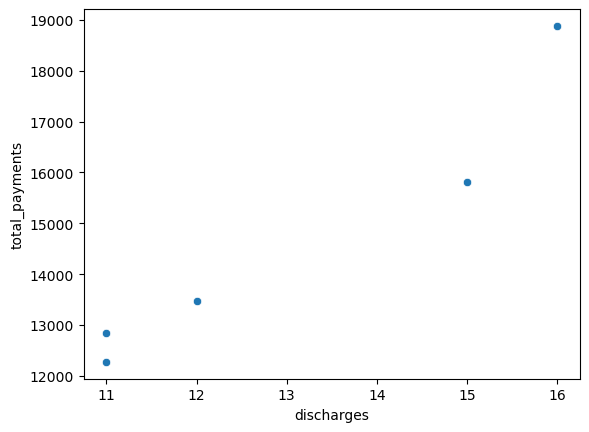

In [171]:
sns.scatterplot(data=surg_df, x='discharges', y='total_payments')

In [ ]:
# #define a relationship function to filter out procedures
# def paymentToCoverage(code):
#     code_filter = coverage_df.procedures
#     procedure_df = coverage_df.loc[code_filter.str.contains(code)].groupby('Provider State')['Average Total Payments'].mean()
#     code_df = pd.DataFrame(procedure_df).reset_index()
#     code_df.plot.bar(x='Provider State', y='Average Total Payments', figsize=[15,5])

# distribution of data